# Universidad de Buenos Aires
# Deep Learning - Examen
# Agosto 2023



El examen comienza al momento de recibir este correo y la ventana de entrega estará abierta hasta el domingo 27 de Agosto a las 20:00hs. Toda comunicación con otros alumnos respecto del examen y la resolución de los ejercicios, queda estrictamente prohibida. Los exámenes serán comparados desde el punto de vista de la redacción, de los resultados y del código para determinar que el trabajo fue 100% individual y único. El examen es a libro abierto, pudiendo utilizar los contenidos vistos en clase y otra bibliografía. Todas las soluciones deben ser originales y si se toman ideas de fuentes externas deben ser correctamente citas incluyendo el correspondiente link o página de libro.

El formato de entrega debe ser un “link a un colab” (compartir a las siguientes direcciones: maxit1992@gmail.com y lelectronfou@gmail.com ) o un “link a un notebook en un github público”.

**Consideraciones a tener en cuenta:**
- Se entregará 1 solo colab para la totalidad del examen.
- Renombrar el archivo de la siguiente manera: **APELLIDO-NOMBRE-DL-Examen AGOSTO 2023.ipynb**
- Los códigos deben poder ejecutarse.
- Los resultados, cómo el código y las explicaciones deben quedar guardados y visualizables en el correspondiente link.
- Prestar atención a las consignas, responder las preguntas cuando corresponda.



## Ejercicio 1



Dada la siguiente función:

$$
f(x,y) = (1.5 - x + xy)^2 + (2.25-x+xy^2)^2 + (2.625 -x + xy^3)^2
$$


Encontrar el punto donde la función es mínima y el valor de dicho mínimo:

a. Utilizando SGD y cálculo de gradiente con regla de la cadena.

b. Utilizando SGD y pytorch.

In [3]:
# Parámetros iniciales
x = 1.0
y = 1.0
alpha = 0.01  # Tasa de aprendizaje
num_iterations = 1000

# Iteraciones de SGD
for _ in range(num_iterations):
    # Calcular las derivadas parciales
    df_dx = 2 * (1.5 - x + x * y) * (-1) + 2 * (2.25 - x + x * y**2) * (-1) + 2 * (2.625 - x + x * y**3) * (-1)
    df_dy = 2 * (1.5 - x + x * y) * x + 2 * (2.25 - x + x * y**2) * (2 * x * y) + 2 * (2.625 - x + x * y**3) * (3 * x * y**2)

    # Actualizar x e y
    x = x - alpha * df_dx
    y = y - alpha * df_dy

# Calcular el valor mínimo
min_value = (1.5 - x + x * y)**2 + (2.25 - x + x * y**2)**2 + (2.625 - x + x * y**3)**2

print("Valor mínimo:", min_value)
print("Valor de x en el mínimo:", x)
print("Valor de y en el mínimo:", y)


Valor mínimo: 0.0004663744511459746
Valor de x en el mínimo: 2.947587456463631
Valor de y en el mínimo: 0.48666352070055824


In [2]:
import torch
from torch.autograd import Variable

# Definir la función
def f(x, y):
    return (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

# Inicializar los valores de x e y como tensores PyTorch
x = Variable(torch.tensor(1.0), requires_grad=True)
y = Variable(torch.tensor(1.0), requires_grad=True)

# Definir el optimizador SGD con tasa de aprendizaje
optimizer = torch.optim.SGD([x, y], lr=0.01)

# Número de iteraciones
num_iterations = 1000

# Realizar las iteraciones
for _ in range(num_iterations):
    # Calcular la función
    output = f(x, y)

    # Calcular los gradientes
    optimizer.zero_grad()
    output.backward()

    # Actualizar los valores de x e y
    optimizer.step()

# Obtener el valor mínimo y los valores de x e y
min_value = f(x, y).item()
min_x = x.item()
min_y = y.item()

print("Valor mínimo:", min_value)
print("Valor de x en el mínimo:", min_x)
print("Valor de y en el mínimo:", min_y)


Valor mínimo: 5.145143222762272e-05
Valor de x en el mínimo: 2.9822511672973633
Valor de y en el mínimo: 0.4955354332923889


## Ejercicio 2

Si tiene una imagen a procesar de 1024x720x3 y desea aplicar en cascada, 2 capas de convolución, seguido por una capa de activación y una de pooling,  con las siguientes características:

*Conv1:*
* tamaño kernel = 7x7
* padding = 2
* stride = 1
* número de kernel = 16

*Conv2:*
* tamaño kernel = 5x5
* padding = 0
* stride = 1
* número de kernel = 32

*activación*
* Tanh()

*pooling*
* tamaño pooling = 5x5
* padding pooling = 0
* stride pooling = 5

a) ¿Cual es el tamaño final de la salida y cuantos canales tiene?

b) Si tiene que conectar esa salida a una `fully_connected` para clasificar 3 clases ¿que tamaño debe tener?






a) El tamaño final de la salida después de aplicar las capas de convolución, activación y pooling será impreso en la variable dimensions.

b) El tamaño requerido para la capa completamente conectada se calculará y se imprimirá en output_fc.shape.

In [5]:
!pip install miceforest

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.0/58.0 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.3 MB/s eta 0:00:00


In [15]:
# Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from miceforest import ImputationKernel
from sklearn import metrics
import torch



In [14]:
# Generando una imagen con el tamaño dado: 1024 x 720 x 3
img = torch.rand(1, 3, 1024, 720)
# Dimensiones: (N, # Canales, H, W)
# Imprimiendo el tamaño de la imagen
print("Tamaño de la imagen de entrada:", img.shape)

# Definiendo las capas
# Capa de convolución 1
conv_layer_1 = torch.nn.Conv2d(in_channels=3, out_channels=16, kernel_size=7, padding=2, stride=1)
# Capa de convolución 2
conv_layer_2 = torch.nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, padding=0, stride=1)
# Capa de activación
activation_layer = torch.nn.Tanh()
# Capa de pooling máximo
pooling_layer = torch.nn.MaxPool2d(kernel_size=5, stride=5, padding=0, ceil_mode=False)

# Paso hacia adelante (Forward)
x = conv_layer_1(img)
x = conv_layer_2(x)
x = activation_layer(x)
output = pooling_layer(x)
print("Tamaño de la imagen de salida:")
dimensions = output.shape
print(dimensions)

# Capa completamente conectada (fully connected)
# Ajustar la dimensión de entrada para la capa completamente conectada
fully_connected_layer = torch.nn.Linear(in_features=dimensions[1]*dimensions[2]*dimensions[3], out_features=3)
output_fc = fully_connected_layer(output.view(output.shape[0], -1))
print("Salida de la capa completamente conectada:")
print(output_fc.shape)


Tamaño de la imagen de entrada: torch.Size([1, 3, 1024, 720])
Tamaño de la imagen de salida:
torch.Size([1, 32, 203, 142])
Salida de la capa completamente conectada:
torch.Size([1, 3])


## Ejercicio 3




Para la siguiente red neuronal recurrente, se pide expresar las ecuaciones "*unfolded*" de la salida de la misma y de sus estados ocultos, si el vector de entrada son 3 muestras secuenciadas de la variable $x(t)$.

![b](https://drive.google.com/uc?export=view&id=1Fz46GTK7Oy_w5OEgwLCLfHFMr7b6-AnL)




Ecuaciones de la RNN:

$$ \hat{y}(t) = w_{h1y} * h1(t) + w_{h2y} * h2(t) + by$$

$$ h1(t) = w_{xh1} * x(t) + w_{h1h1} * h1(t-1) + w_{h2h1} * h2(t-1)+ bh1$$
$$ h2(t) = w_{xh2} * x(t) + w_{h2h2} * h2(t-1) + w_{h1h2} * h1(t-1)+ bh2 $$

In [19]:
# Parámetros de la red neuronal recurrente, ** valores ramdom ***
w_h1y = 0.5
w_h2y = 0.7
by = 0.3

w_xh1 = 0.2
w_h1h1 = 0.4
w_h2h1 = -0.1
bh1 = -0.1

w_xh2 = -0.3
w_h2h2 = 0.6
w_h1h2 = 0.2
bh2 = 0.5

# Valores iniciales
h1_prev = 0.0  # Estado oculto 1 en t=-1
h2_prev = 0.0  # Estado oculto 2 en t=-1

# Entradas en diferentes tiempos
x_t0 = 0.0
x_t1 = 0.8
x_t2 = -0.5
######################################################################################################
# Calculando la salida y los estados ocultos desplegados en el tiempo
h1_t0 = w_xh1 * x_t0 + w_h1h1 * h1_prev + w_h2h1 * h2_prev + bh1
h2_t0 = w_xh2 * x_t0 + w_h2h2 * h2_prev + w_h1h2 * h1_prev + bh2
y_t0 = w_h1y * h1_t0 + w_h2y * h2_t0 + by

h1_t1 = w_xh1 * x_t1 + w_h1h1 * h1_t0 + w_h2h1 * h2_t0 + bh1
h2_t1 = w_xh2 * x_t1 + w_h2h2 * h2_t0 + w_h1h2 * h1_t0 + bh2
y_t1 = w_h1y * h1_t1 + w_h2y * h2_t1 + by

h1_t2 = w_xh1 * x_t2 + w_h1h1 * h1_t1 + w_h2h1 * h2_t1 + bh1
h2_t2 = w_xh2 * x_t2 + w_h2h2 * h2_t1 + w_h1h2 * h1_t1 + bh2
y_t2 = w_h1y * h1_t2 + w_h2y * h2_t2 + by
#######################################################################################################
#print("Salida y(t=0):", y_t0)
#print("Estado oculto 1 h1(t=0):", h1_t0)
#print("Estado oculto 2 h2(t=0):", h2_t0)

#print("Salida y(t=1):", y_t1)
#print("Estado oculto 1 h1(t=1):", h1_t1)
#print("Estado oculto 2 h2(t=1):", h2_t1)

#print("Salida y(t=2):", y_t2)
#print("Estado oculto 1 h1(t=2):", h1_t2)
#print("Estado oculto 2 h2(t=2):", h2_t2)


## Ejercicio 4



Descargar el dataset del siguiente link: https://drive.google.com/file/d/1X8_G5BpQMi-Nnbtms2RL8lcWSxzD8ixd/view?usp=sharing. El dataset son compras de productos que diferentes clientes realizaron durante un black sales. El dataset contiene información sobre las transacciones y el objetivo es poder utilizar el dataset para crear diferentes modelos que puedan predecir cuánto un cliente está dispuesto a gastar en un producto en el futuro. Particularmente, vamos a tratar este problema como una clasificación binaria donde queremos averiguar si el cliente va a gastar mucha plata (más de 9000) o poca plata (menos de 9000).

- a)	Entrenar un modelo de deep learning que no utilice embeddings y que no emplee el `user_id` ni el `product_id`.
- b)	Entrenar un modelo de deep learning que utilice embeddings tanto para los productos como los usuarios. Realizar el mapeo de identificador de producto y usuarios a indices antes de separar el dataset en training, validation y testing.
- c)	Grafique las curvas de la loss function en función de las epochs de cada modelo y comente lo necesario.
- d) Compare el score de cada modelo.



In [1]:
#Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from miceforest import ImputationKernel
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import torch
from torch.utils.data import Dataset, DataLoader

In [2]:

# Ruta al archivo CSV
csv_file_path = './data/dataset_black_sales.csv'

# Intenta cargar el archivo CSV
try:
    df_blacks = pd.read_csv(csv_file_path)
    print("Archivo CSV cargado exitosamente.")
    print("Número de filas:", len(df_blacks))
    print("Columnas:", df_blacks.columns)
except pd.errors.ParserError as e:
    print("Error al cargar el archivo CSV:", e)

Archivo CSV cargado exitosamente.
Número de filas: 550068
Columnas: Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')


In [3]:
# Check for dataset dimensions,datatype and number feature,unique values
df_blacks.shape
df_blacks.info()
df_blacks.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

In [4]:
df_blacks.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


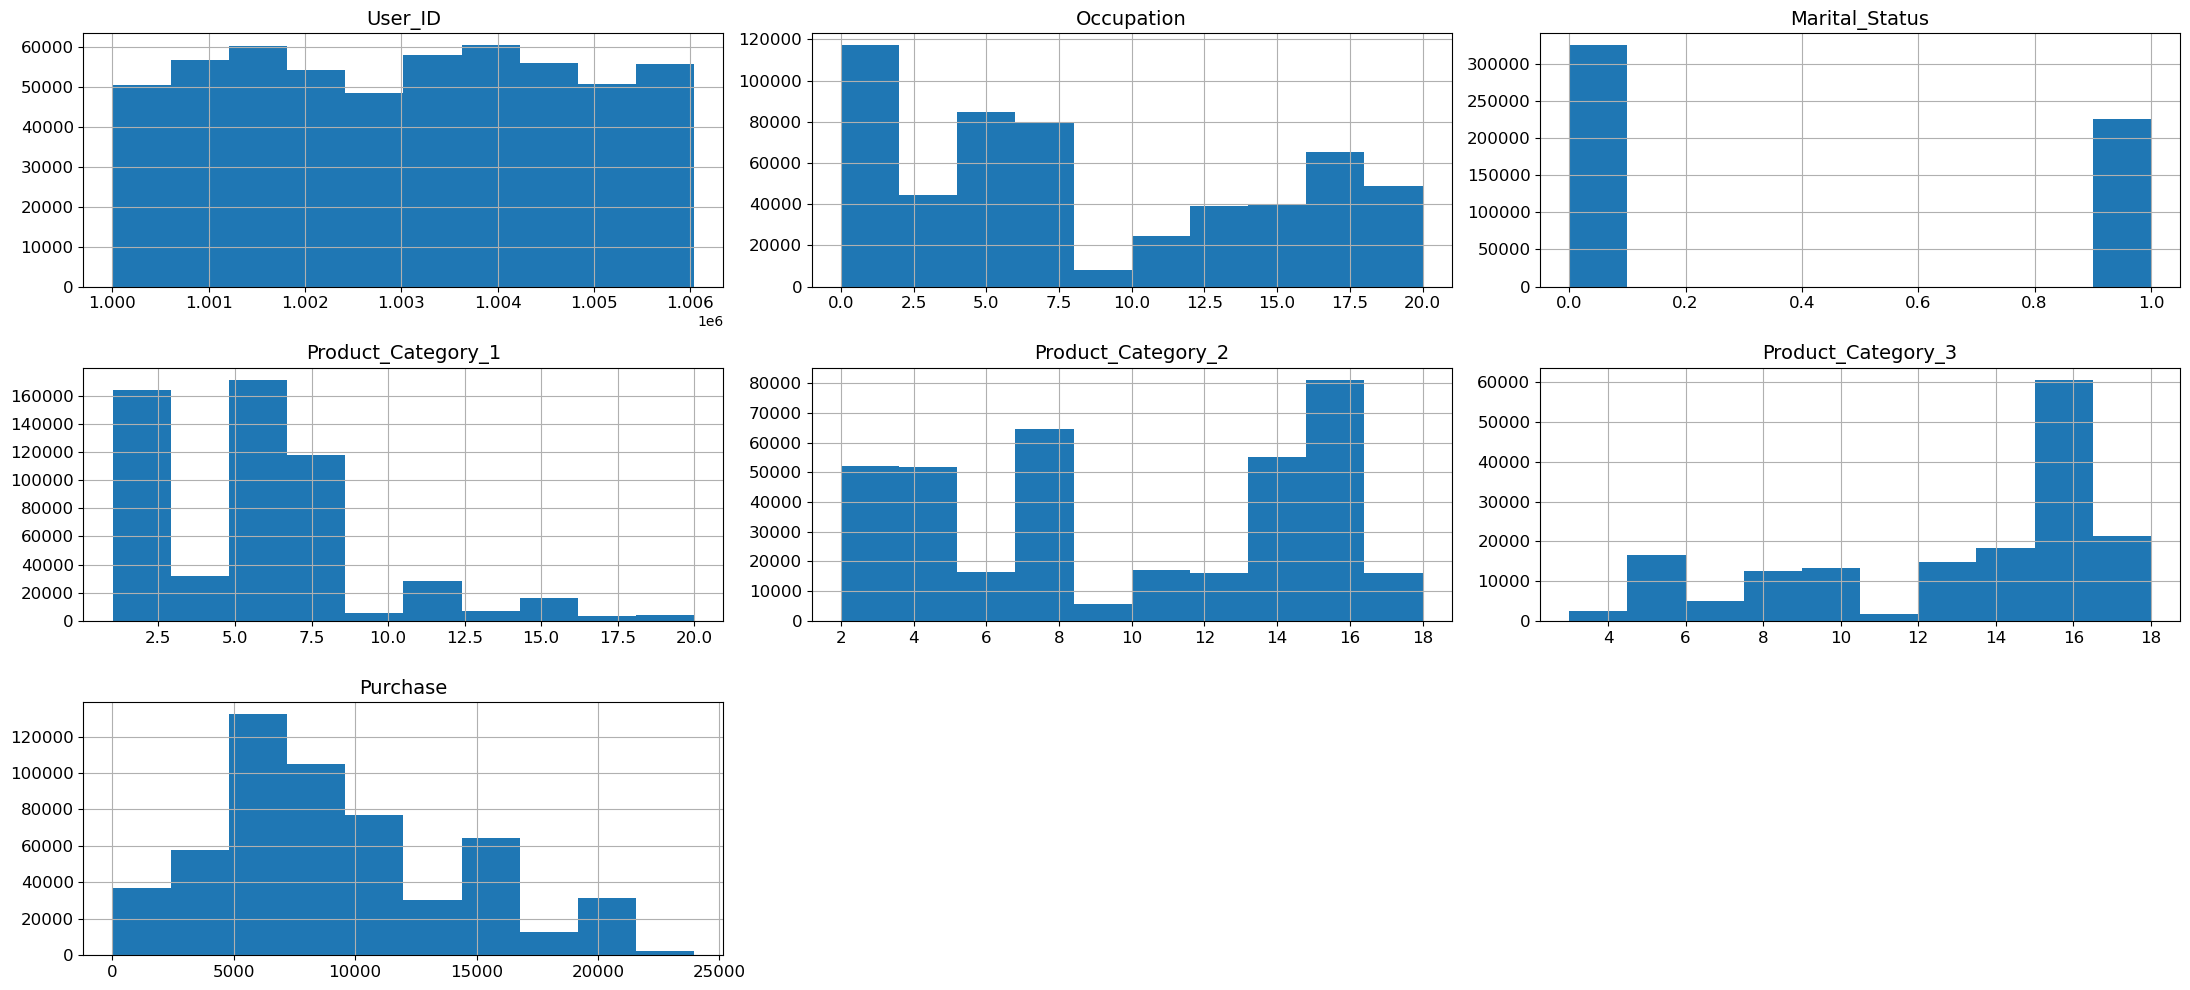

In [5]:
# Función para mostrar la distribución del dataset
def display_dataset_distributions(dataset):
    # Crear histogramas para cada columna
    fig = dataset.hist(xlabelsize=12, ylabelsize=12, figsize=(22, 10))
    
    # Ajustar los títulos y tamaños de letra de los ejes
    [x.title.set_size(14) for x in fig.ravel()]
    
    # Ajustar el diseño para evitar superposiciones
    plt.tight_layout()
    
    # Mostrar los histogramas
    plt.show()

# Mostrar la distribución del dataset cargado
display_dataset_distributions(df_blacks)

c:\Users\siles\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


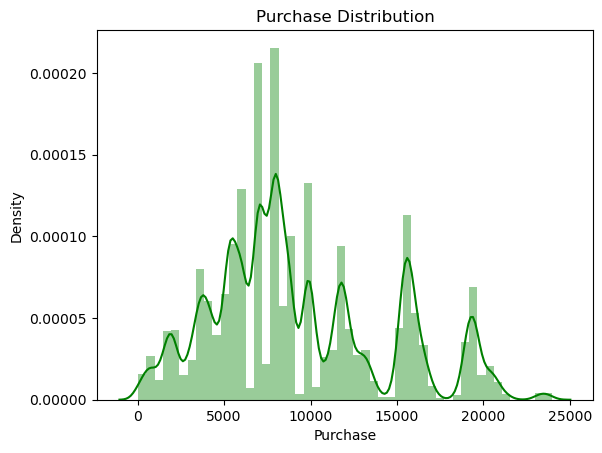

In [6]:
sns.distplot(df_blacks["Purchase"], color='g')
plt.title("Purchase Distribution")
plt.show()

In [7]:
df_blacks['Purchase'].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

In [8]:
#Encoding
df_blacks_modified = pd.get_dummies(df_blacks, columns=['Stay_In_Current_City_Years'])
df_blacks_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   User_ID                        550068 non-null  int64  
 1   Product_ID                     550068 non-null  object 
 2   Gender                         550068 non-null  object 
 3   Age                            550068 non-null  object 
 4   Occupation                     550068 non-null  int64  
 5   City_Category                  550068 non-null  object 
 6   Marital_Status                 550068 non-null  int64  
 7   Product_Category_1             550068 non-null  int64  
 8   Product_Category_2             376430 non-null  float64
 9   Product_Category_3             166821 non-null  float64
 10  Purchase                       550068 non-null  int64  
 11  Stay_In_Current_City_Years_0   550068 non-null  uint8  
 12  Stay_In_Current_City_Years_1  

In [9]:
label_encoder = LabelEncoder()

In [10]:
df_blacks_modified['Gender'] = label_encoder.fit_transform(
    df_blacks_modified['Gender'])

In [11]:
df_blacks_modified['Age'] = label_encoder.fit_transform(
    df_blacks_modified['Age'])

In [12]:
df_blacks_modified['City_Category'] = label_encoder.fit_transform(
    df_blacks_modified['City_Category'])

In [13]:
df_blacks_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   User_ID                        550068 non-null  int64  
 1   Product_ID                     550068 non-null  object 
 2   Gender                         550068 non-null  int32  
 3   Age                            550068 non-null  int32  
 4   Occupation                     550068 non-null  int64  
 5   City_Category                  550068 non-null  int32  
 6   Marital_Status                 550068 non-null  int64  
 7   Product_Category_1             550068 non-null  int64  
 8   Product_Category_2             376430 non-null  float64
 9   Product_Category_3             166821 non-null  float64
 10  Purchase                       550068 non-null  int64  
 11  Stay_In_Current_City_Years_0   550068 non-null  uint8  
 12  Stay_In_Current_City_Years_1  

In [14]:
#missing v.i
len(df_blacks_modified[df_blacks_modified['Purchase'].isna()])

df_blacks_modified = df_blacks_modified[df_blacks_modified['Purchase'].notna()]
(df_blacks_modified.isnull().sum()/len(df_blacks_modified))*100


User_ID                           0.000000
Product_ID                        0.000000
Gender                            0.000000
Age                               0.000000
Occupation                        0.000000
City_Category                     0.000000
Marital_Status                    0.000000
Product_Category_1                0.000000
Product_Category_2               31.566643
Product_Category_3               69.672659
Purchase                          0.000000
Stay_In_Current_City_Years_0      0.000000
Stay_In_Current_City_Years_1      0.000000
Stay_In_Current_City_Years_2      0.000000
Stay_In_Current_City_Years_3      0.000000
Stay_In_Current_City_Years_4+     0.000000
dtype: float64

In [15]:
user_id = df_blacks_modified['User_ID']
product_id = df_blacks_modified['Product_ID']

In [17]:
df_blacks_preprocessed = df_blacks_modified.drop(['User_ID', 'Product_ID'], axis=1)

In [18]:
# Missing variables imputation with MICE methods
mice_kernel = ImputationKernel(
    data=df_blacks_preprocessed, save_all_iterations=True,
    random_state=42)

In [19]:
mice_kernel.mice(2)
df_blacks_final = mice_kernel.complete_data()
df_blacks_final.head()

,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,0,0,10,0,0,3,4.0,5.0,8370,0,0,1,0,0
1,0,0,10,0,0,1,6.0,14.0,15200,0,0,1,0,0
2,0,0,10,0,0,12,14.0,17.0,1422,0,0,1,0,0
3,0,0,10,0,0,12,14.0,17.0,1057,0,0,1,0,0
4,1,6,16,2,0,8,14.0,17.0,7969,0,0,0,0,1


In [20]:
df_blacks_final.isnull().sum()

Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Marital_Status                   0
Product_Category_1               0
Product_Category_2               0
Product_Category_3               0
Purchase                         0
Stay_In_Current_City_Years_0     0
Stay_In_Current_City_Years_1     0
Stay_In_Current_City_Years_2     0
Stay_In_Current_City_Years_3     0
Stay_In_Current_City_Years_4+    0
dtype: int64

In [21]:
df_blacks_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550068 entries, 0 to 550067
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Gender                         550068 non-null  int32  
 1   Age                            550068 non-null  int32  
 2   Occupation                     550068 non-null  int64  
 3   City_Category                  550068 non-null  int32  
 4   Marital_Status                 550068 non-null  int64  
 5   Product_Category_1             550068 non-null  int64  
 6   Product_Category_2             550068 non-null  float64
 7   Product_Category_3             550068 non-null  float64
 8   Purchase                       550068 non-null  int64  
 9   Stay_In_Current_City_Years_0   550068 non-null  uint8  
 10  Stay_In_Current_City_Years_1   550068 non-null  uint8  
 11  Stay_In_Current_City_Years_2   550068 non-null  uint8  
 12  Stay_In_Current_City_Years_3  

In [22]:
df_blacks_final['Purchase_level'] = df_blacks_final['Purchase'].apply(
    lambda q: 0 if q <= 9000 else 1)

In [23]:
# Drop the target 
x = df_blacks_final.drop(['Purchase', 'Purchase_level'], axis=1)
y = df_blacks_final['Purchase_level']

x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550068 entries, 0 to 550067
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Gender                         550068 non-null  int32  
 1   Age                            550068 non-null  int32  
 2   Occupation                     550068 non-null  int64  
 3   City_Category                  550068 non-null  int32  
 4   Marital_Status                 550068 non-null  int64  
 5   Product_Category_1             550068 non-null  int64  
 6   Product_Category_2             550068 non-null  float64
 7   Product_Category_3             550068 non-null  float64
 8   Stay_In_Current_City_Years_0   550068 non-null  uint8  
 9   Stay_In_Current_City_Years_1   550068 non-null  uint8  
 10  Stay_In_Current_City_Years_2   550068 non-null  uint8  
 11  Stay_In_Current_City_Years_3   550068 non-null  uint8  
 12  Stay_In_Current_City_Years_4+ 

In [24]:
#dataset division
# Normalization
x = x.to_numpy()
y = y.to_numpy()
x_normalized = (x - np.min(x, axis=0))/(np.max(x, axis=0) - np.min(x, axis=0))

In [25]:
idx = np.random.permutation(x_normalized.shape[0])
train_idx = idx[0:int(0.80*len(idx))]
valid_idx = idx[int(0.80*len(idx)):int(0.90*len(idx)):]
test_idx = idx[int(0.90*len(idx)):]

In [26]:
# Seleccionar los datos para entrenamiento, validación y prueba basados en los índices
train_x = x_normalized[train_idx]  # Datos normalizados para entrenamiento
train_y = y[train_idx]              # Objetivos correspondientes para entrenamiento
valid_x = x_normalized[valid_idx]  # Datos normalizados para validación
valid_y = y[valid_idx]              # Objetivos correspondientes para validación
test_x = x_normalized[test_idx]    # Datos normalizados para prueba
test_y = y[test_idx]                # Objetivos correspondientes para prueba

# Calcular la cantidad de muestras en cada conjunto
n_train = train_x.shape[0]  # Número de muestras en el conjunto de entrenamiento
n_valid = valid_x.shape[0]  # Número de muestras en el conjunto de validación
n_test = test_x.shape[0]    # Número de muestras en el conjunto de prueba


Training neuronal network

In [ ]:
# Definición de la clase MyDataset que hereda de Dataset
class MyDataset(Dataset):

    def __init__(self, x, y) -> None:
        self.x = x  # Almacenar los datos de entrada
        self.y = y  # Almacenar los objetivos

    def __len__(self):
        return self.x.shape[0]  # Devolver la longitud del conjunto de datos

    def __getitem__(self, index: Any) -> Any:
        # Devolver el par de datos y objetivo correspondiente al índice dado
        return self.x[index], self.y[index]

In [30]:
# Creando el conjunto de datos para entrenamiento
train_df = MyDataset(train_x, train_y)

# Creando el conjunto de datos para prueba
test_df = MyDataset(test_x, test_y)

# Creando el conjunto de datos para validación
validation_df = MyDataset(valid_x, valid_y)


In [31]:
# Train and valid dataloader
train_dataloader = DataLoader(train_df, batch_size=64, shuffle=True)
test_dataloader = DataLoader(train_df, batch_size=64, shuffle=True)
validation_dataloader = DataLoader(validation_df, batch_size=64)

In [32]:

# Definición de la arquitectura de la red neuronal
class NNet(torch.nn.Module):
    # Inicialización de la arquitectura
    def __init__(self):
        super().__init__()  # Llamada al constructor de la clase base
        # Definición de la primera capa lineal
        self.linear_1 = torch.nn.Linear(in_features=13, out_features=200, bias=True)
        self.relu_1 =  torch.nn.ReLU()  # Función de activación ReLU
        # Definición de la segunda capa lineal
        self.linear_2 = torch.nn.Linear(in_features=200, out_features=100, bias=True)
        self.relu_2 =  torch.nn.ReLU()  # Función de activación ReLU
        # Definición de la capa de salida
        self.output = torch.nn.Linear(in_features=100, out_features=1, bias=True)

    # Función de propagación hacia adelante (Forward)
    def forward(self, x):
        x = self.linear_1(x)  # Paso a través de la primera capa lineal
        x = self.relu_1(x)     # Aplicación de la función de activación ReLU
        x = self.linear_2(x)   # Paso a través de la segunda capa lineal
        x = self.relu_2(x)     # Aplicación de la función de activación ReLU
        x = self.output(x)     # Paso a través de la capa de salida

        return x  # Retornar el resultado de la propagación hacia adelante


In [33]:
#Instance the net object
nnetwork = NNet()

In [34]:
#Loss function and optimizer
loss_function = torch.nn.BCEWithLogitsLoss(reduction='sum')
optimizer = torch.optim.Adam(nnetwork.parameters(), lr=0.005)

In [35]:
#Choosing the device where the script will be executed.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [36]:
nnetwork = nnetwork.to(device)

In [37]:
# Mini-batch algorithm
# Algoritmo de mini lotes
# Número de épocas
epochs = 100

# Listas para almacenar las pérdidas por época
train_loss_by_epoch = []
valid_loss_by_epoch = []
test_loss_by_epoch = []

# Bucle principal para el algoritmo de mini lotes a lo largo de las épocas
for epoch in range(epochs):
  
  # Establecer la red neuronal en modo de entrenamiento
  nnetwork.train(True)

  epoch_loss = 0
  epoch_y_hat = []
  epoch_y = []
  
  for i, data in enumerate(train_dataloader):
    # Obtener los datos del lote de entrenamiento
    x_batch, y_batch = data
    # Colocar el lote en el dispositivo donde se entrenará la red neuronal
    x_batch = x_batch.to(device).float()
    y_batch = y_batch.to(device).float().reshape(-1, 1)


    ##Propagación hacia adelante             

    
    # Limpiar el optimizador para comenzar un nuevo cálculo de gradientes
    optimizer.zero_grad()
    nnet_output = nnetwork(x_batch)
    y_batch_hat = torch.sigmoid(nnet_output)
    
    # Calcular la pérdida
    loss = loss_function(nnet_output, y_batch)

    ##Retropropagación#

    loss.backward()

    # Actualizar los parámetros
    optimizer.step()

    # Almacenar los valores reales y las predicciones para calcular las métricas
    epoch_y += list(y_batch.detach().cpu().numpy())
    epoch_y_hat += list(y_batch_hat.detach().cpu().numpy())
    
    epoch_loss = epoch_loss + loss.item()

  # Calcular el promedio de la pérdida
  epoch_loss = epoch_loss / n_train
  # Almacenar los valores de pérdida para graficar
  train_loss_by_epoch.append(epoch_loss)
  # Calcular la precisión por época 
  accuracy = metrics.accuracy_score(epoch_y, [j>=0.5 for j in epoch_y_hat])


  # #Validación               ##

  
  # Desactivar el cálculo de gradientes en el proceso de validación
  nnetwork.train(False)

  valid_epoch_loss = 0
  valid_epoch_y_hat = []
  valid_epoch_y = []

  for i, data in enumerate(validation_dataloader):
    # Obtener los datos del lote de validación
    x_batch, y_batch = data
    # Colocar el lote en el dispositivo donde se entrenará la red neuronal
    x_batch = x_batch.to(device).float()
    y_batch = y_batch.to(device).float().reshape(-1, 1)

    ## Propagación hacia adelante##
    
    nnet_output = nnetwork(x_batch)
    y_batch_hat = torch.sigmoid(nnet_output)
    
    # Calcular los valores de pérdida
    loss = loss_function(nnet_output, y_batch)

    # No propagar en la validación

    # Almacenar los valores reales y las predicciones para calcular las métricas
    valid_epoch_y += list(y_batch.detach().cpu().numpy())
    valid_epoch_y_hat += list(y_batch_hat.detach().cpu().numpy())
    # Almacenar la pérdida del lote
    valid_epoch_loss = valid_epoch_loss + loss.item()

  # Calcular el promedio de la pérdida
  valid_epoch_loss = valid_epoch_loss / n_valid
  # Almacenar la pérdida para graficar
  valid_loss_by_epoch.append(valid_epoch_loss)
  # Calcular la precisión por época 
  valid_accuracy = metrics.accuracy_score(valid_epoch_y, [j>=0.5 for j in valid_epoch_y_hat])


  ##Pruebas ##

  
  # Establecer la red neuronal en modo de entrenamiento
  nnetwork.train(True)

  test_epoch_loss = 0
  test_epoch_y_hat = []
  test_epoch_y = []
  
  for i, data in enumerate(test_dataloader):
    # Obtener los datos del lote de pruebas
    x_batch, y_batch = data
    # Colocar el lote en el dispositivo donde se entrenará la red neuronal
    x_batch = x_batch.to(device).float()
    y_batch = y_batch.to(device).float().reshape(-1, 1)

    ##Propagación hacia adelante##

    
    # Limpiar el optimizador para comenzar un nuevo cálculo de gradientes
    optimizer.zero_grad()
    nnet_output = nnetwork(x_batch)
    y_batch_hat = torch.sigmoid(nnet_output)
    
    # Calcular la pérdida
    loss = loss_function(nnet_output, y_batch)

    ##Retropropagación##
    loss.backward()

    # Actualizar los parámetros
    optimizer.step()

    # Almacenar los valores reales y las predicciones para calcular las métricas
    test_epoch_y += list(y_batch.detach().cpu().numpy())
    test_epoch_y_hat += list(y_batch_hat.detach().cpu().numpy())
    
    test_epoch_loss = test_epoch_loss + loss.item()

  # Calcular el promedio de la pérdida
  test_epoch_loss = test_epoch_loss / n_test
  # Almacenar los valores de pérdida para graficar
  test_loss_by_epoch.append(test_epoch_loss)
  # Calcular la precisión por época 
  accuracy = metrics.accuracy_score(test_epoch_y, [j>=0.5 for j in test_epoch_y_hat])

  
  print(f" Época {epoch} | " \
        f"Pérdida Entrenamiento/Validación: {epoch_loss:.3f} / {valid_epoch_loss:.3f} | " \
        f"Precisión Entrenamiento/Validación: {accuracy:.3f} / {valid_accuracy:.3f}")


 Época 0 | Pérdida Entrenamiento/Validación: 0.392 / 0.348 | Precisión Entrenamiento/Validación: 0.852 / 0.849
 Época 1 | Pérdida Entrenamiento/Validación: 0.347 / 0.344 | Precisión Entrenamiento/Validación: 0.854 / 0.850
 Época 2 | Pérdida Entrenamiento/Validación: 0.327 / 0.324 | Precisión Entrenamiento/Validación: 0.863 / 0.864
 Época 3 | Pérdida Entrenamiento/Validación: 0.322 / 0.321 | Precisión Entrenamiento/Validación: 0.864 / 0.864
 Época 4 | Pérdida Entrenamiento/Validación: 0.319 / 0.318 | Precisión Entrenamiento/Validación: 0.864 / 0.864
 Época 5 | Pérdida Entrenamiento/Validación: 0.319 / 0.318 | Precisión Entrenamiento/Validación: 0.864 / 0.863
 Época 6 | Pérdida Entrenamiento/Validación: 0.319 / 0.331 | Precisión Entrenamiento/Validación: 0.864 / 0.858
 Época 7 | Pérdida Entrenamiento/Validación: 0.317 / 0.315 | Precisión Entrenamiento/Validación: 0.864 / 0.865
 Época 8 | Pérdida Entrenamiento/Validación: 0.317 / 0.316 | Precisión Entrenamiento/Validación: 0.864 / 0.864
 

Text(0, 0.5, 'BCE')

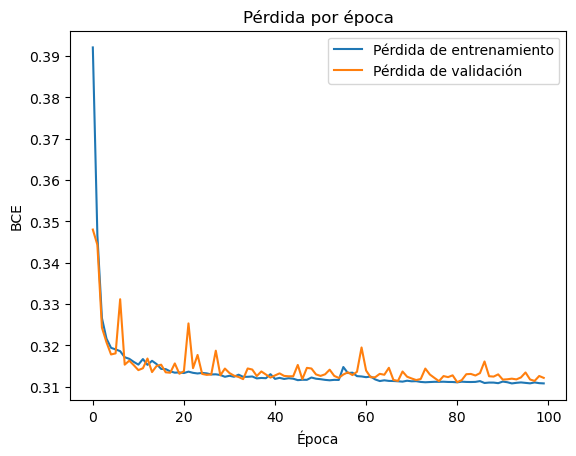

In [38]:
# Creación del gráfico para la pérdida por época
fig, ax1 = plt.subplots(1, 1)

# Graficar la pérdida de entrenamiento y validación
ax1.plot(train_loss_by_epoch, label="Pérdida de entrenamiento")
ax1.plot(valid_loss_by_epoch, label="Pérdida de validación")

# Agregar una leyenda al gráfico
ax1.legend()

# Configurar el título del gráfico
ax1.set_title("Pérdida por época")

# Configurar etiquetas en el eje x y el eje y
ax1.set_xlabel("Época")
ax1.set_ylabel("BCE")


In [39]:
#training model with embedding
len(user_id.unique())


5891

In [40]:
user_id.unique()

array([1000001, 1000002, 1000003, ..., 1004113, 1005391, 1001529],
      dtype=int64)

In [41]:
len(product_id.unique())

3631

In [42]:
# Characteristics of the product_id feature
product_id.unique()

array(['P00069042', 'P00248942', 'P00087842', ..., 'P00370293',
       'P00371644', 'P00370853'], dtype=object)

In [43]:
#Transform the user_id variable to use like embedding
user_id_to_idx = {value:i for i, value in enumerate(user_id.unique())}

In [44]:
#Transforming the product_id variable to use like embedding
product_id_to_idx = {value:j for j, value in enumerate(product_id.unique())}

In [45]:
# Vectors of user_id and product_id on the dataset
user_idx = np.array([user_id_to_idx[value] for value in user_id])
product_idx = np.array([product_id_to_idx[value] for value in product_id])


In [46]:
# Splitting up the vector user_idx in training, testing and validation
user_idx_train = user_idx[train_idx]
user_idx_validation = user_idx[valid_idx]
user_idx_test = user_idx[test_idx]

In [47]:
# Splitting up the vector product_idx in training, testing and validation
product_idx_train = product_idx[train_idx]
product_idx_validation = product_idx[valid_idx]
product_idx_test = product_idx[test_idx]

In [48]:
class DatasetWithEmbeddings(Dataset):

    def __init__(self, x, user_idx, product_idx, y) -> None:
        self.x = x                  # Datos generales
        self.user_idx = user_idx    # Índices de usuarios
        self.product_idx = product_idx  # Índices de productos
        self.y = y                  # Objetivos

    def __len__(self):
        return self.x.shape[0]  # Devolver la longitud del conjunto de datos

    def __getitem__(self, index) -> Any:
        # Devolver los datos generales, índices de usuario, índices de producto y objetivo correspondientes al índice dado
        return self.x[index], self.user_idx[index], self.product_idx[index], self.y[index]

In [49]:
# Crear conjuntos de datos con incrustaciones para entrenamiento, validación y pruebas
train_df_embeddings = DatasetWithEmbeddings(train_x, user_idx_train, product_idx_train, train_y)
validation_df_embeddings = DatasetWithEmbeddings(valid_x, user_idx_validation, product_idx_validation, valid_y)
test_df_embeddings = DatasetWithEmbeddings(test_x, user_idx_test, product_idx_test, test_y)


In [50]:
# Crear dataloaders para los conjuntos de datos con incrustaciones de entrenamiento, validación y pruebas
train_dataloader_embeddings = DataLoader(train_df_embeddings, batch_size=64, shuffle=True)
validation_dataloader_embeddings = DataLoader(validation_df_embeddings, batch_size=64)
test_dataloader_embeddings = DataLoader(test_df_embeddings, batch_size=64, shuffle=True)


In [51]:
# Definición de la arquitectura de la red neuronal con incrustaciones
class NNetworkWithEmbeddings(torch.nn.Module):

  def __init__(self):
    super().__init__()
    
    # Capa de incrustación para los índices de usuario
    self.embeddings_user = torch.nn.Embedding(num_embeddings=5891, embedding_dim=8)
    
    # Capa de incrustación para los índices de producto
    self.embeddings_product = torch.nn.Embedding(num_embeddings=3631, embedding_dim=8)
    
    # Capa de dropout para regularización
    self.dropout_1 = torch.nn.Dropout(p=0.5)
    
    # Capa lineal 1
    self.linear_1 = torch.nn.Linear(in_features=29, out_features=200, bias=True)
    
    # Función de activación ReLU 1
    self.relu_1 = torch.nn.ReLU()
    
    # Capa lineal 2
    self.linear_2 = torch.nn.Linear(in_features=200, out_features=100, bias=True)
    
    # Función de activación ReLU 2
    self.relu_2 = torch.nn.ReLU()
    
    # Capa de salida
    self.output = torch.nn.Linear(in_features=100, out_features=1, bias=True)

  def forward(self, x, user_idx, product_idx):
    # Obtener las incrustaciones para los índices de usuario y producto
    embeddings_output_user = self.embeddings_user(user_idx)
    embedding_output_product = self.embeddings_product(product_idx)
    
    # Concatenar las incrustaciones con las características de entrada
    x = torch.cat([x, embeddings_output_user, embedding_output_product], dim=1)
    
    # Pasar a través de las capas de la red
    x = self.linear_1(x)
    x = self.dropout_1(x)
    x = self.relu_1(x)
    x = self.linear_2(x)
    x = self.relu_2(x)
    x = self.output(x)
    return x


In [52]:
nnnetWithEmbeddings = NNetworkWithEmbeddings()
nnnetWithEmbeddings = nnnetWithEmbeddings.to(device)

In [53]:
nnnetWithEmbeddings

NNetworkWithEmbeddings(
  (embeddings_user): Embedding(5891, 8)
  (embeddings_product): Embedding(3631, 8)
  (dropout_1): Dropout(p=0.5, inplace=False)
  (linear_1): Linear(in_features=29, out_features=200, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=200, out_features=100, bias=True)
  (relu_2): ReLU()
  (output): Linear(in_features=100, out_features=1, bias=True)
)

In [54]:
# Loss function and optimizer
loss_function = torch.nn.BCEWithLogitsLoss(reduction='sum')
# Optimizador con regularización L2 (parámetro weight_decay)
optimizer = torch.optim.Adam(nnnetWithEmbeddings.parameters(), lr=0.005, weight_decay=0.01)

In [55]:
# Número de épocas
epochs = 100

# Listas para almacenar las pérdidas por época
train_loss_by_epoch = []
valid_loss_by_epoch = []
test_loss_by_epoch = []

# Bucle principal para las épocas
for epoch in range(epochs):

  ## Entrenamiento ##

  # Establecer la red en modo de entrenamiento
  nnnetWithEmbeddings.train(True)

  epoch_loss = 0
  epoch_y_hat = []
  epoch_y = []

  # Bucle para los lotes en el dataloader de entrenamiento con incrustaciones
  for i, data in enumerate(train_dataloader_embeddings):
    # Obtener el lote de datos para el entrenamiento
    x_batch, user_idx_batch, product_idx_batch, y_batch = data
    # Enviar el lote al dispositivo donde se entrenará la red
    x_batch = x_batch.to(device).float()
    user_idx_batch = user_idx_batch.to(device).int()
    product_idx_batch = product_idx_batch.to(device).int()
    y_batch = y_batch.to(device).float().reshape(-1, 1)

    ## Propagación hacia adelante ##

    # Limpiar el optimizador para comenzar un nuevo cálculo de gradientes
    optimizer.zero_grad()
    nnet_output = nnnetWithEmbeddings(x_batch, user_idx_batch, product_idx_batch)
    y_batch_hat = torch.sigmoid(nnet_output)

    # Calcular la pérdida
    loss = loss_function(nnet_output, y_batch)

    ## Retropropagación ##

    loss.backward()

    # Actualizar los parámetros
    optimizer.step()

    # Almacenar los valores y predicciones para calcular las métricas
    epoch_y += list(y_batch.detach().cpu().numpy())
    epoch_y_hat += list(y_batch_hat.detach().cpu().numpy())

    epoch_loss = epoch_loss + loss.item()

  # Calcular el promedio de la pérdida
  epoch_loss = epoch_loss / n_train
  # Almacenar los valores de pérdida para graficar
  train_loss_by_epoch.append(epoch_loss)
  # Calcular la métrica por época
  accuracy = metrics.accuracy_score(epoch_y, [j>=0.5 for j in epoch_y_hat])


for epoch in range(epochs):

  ## Pruebas ##

  # Establecer la red en modo de entrenamiento
  nnnetWithEmbeddings.train(True)

  test_epoch_loss = 0
  test_epoch_y_hat = []
  test_epoch_y = []

  # Bucle para los lotes en el dataloader de pruebas con incrustaciones
  for i, data in enumerate(test_dataloader_embeddings):
    # Obtener el lote de datos para las pruebas
    x_batch, user_idx_batch, product_idx_batch, y_batch = data
    # Enviar el lote al dispositivo donde se entrenará la red
    x_batch = x_batch.to(device).float()
    user_idx_batch = user_idx_batch.to(device).int()
    product_idx_batch = product_idx_batch.to(device).int()
    y_batch = y_batch.to(device).float().reshape(-1, 1)

    ## Propagación hacia adelante ##

    # Limpiar el optimizador para comenzar un nuevo cálculo de gradientes
    optimizer.zero_grad()
    nnet_output = nnnetWithEmbeddings(x_batch, user_idx_batch, product_idx_batch)
    y_batch_hat = torch.sigmoid(nnet_output)

    # Calcular la pérdida
    loss = loss_function(nnet_output, y_batch)

    ## Retropropagación ##

    loss.backward()

    # Actualizar los parámetros
    optimizer.step()

    # Almacenar los valores y predicciones para calcular las métricas
    test_epoch_y += list(y_batch.detach().cpu().numpy())
    test_epoch_y_hat += list(y_batch_hat.detach().cpu().numpy())

    test_epoch_loss = test_epoch_loss + loss.item()

  # Calcular el promedio de la pérdida
  test_epoch_loss = test_epoch_loss / n_test
  # Almacenar los valores de pérdida para graficar
  test_loss_by_epoch.append(test_epoch_loss)
  # Calcular la métrica por época
  test_accuracy = metrics.accuracy_score(test_epoch_y, [j>=0.5 for j in test_epoch_y_hat])


  ## Validación ##

  # Desactivar el cálculo de gradientes
  nnnetWithEmbeddings.train(False)

  valid_epoch_loss = 0
  valid_epoch_y_hat = []
  valid_epoch_y = []

  # Bucle para los lotes en el dataloader de validación con incrustaciones
  for i, data in enumerate(validation_dataloader_embeddings):
    # Obtener los datos del lote de validación
    x_batch, user_idx_batch, product_idx_batch, y_batch = data
    # Enviar los lotes al dispositivo donde se entrenará la red
    x_batch = x_batch.to(device).float()
    user_idx_batch = user_idx_batch.to(device).int()
    product_idx_batch = product_idx_batch.to(device).int()
    y_batch = y_batch.to(device).float().reshape(-1, 1)

    ## Propagación hacia adelante ##

    nnet_output = nnnetWithEmbeddings(x_batch, user_idx_batch, product_idx_batch)
    y_batch_hat = torch.sigmoid(nnet_output)

    # Calcular la pérdida
    loss = loss_function(nnet_output, y_batch)

    # En validación no se realiza la retropropagación

    # Almacenar los valores y predicciones para calcular las métricas
    valid_epoch_y += list(y_batch.detach().cpu().numpy())
    valid_epoch_y_hat += list(y_batch_hat.detach().cpu().numpy())

    valid_epoch_loss = valid_epoch_loss + loss.item()

  # Calcular el promedio de la pérdida
  valid_epoch_loss = valid_epoch_loss / n_valid
  # Almacenar los valores de pérdida para graficar
  valid_loss_by_epoch.append(valid_epoch_loss)
  # Calcular la métrica por época
  valid_accuracy = metrics.accuracy_score(valid_epoch_y, [j>=0.5 for j in valid_epoch_y_hat])

  ## Imprimir los resultados por época ##

  print(f"Época {epoch} | " \
        f"Pérdida Entrenamiento/Validación/Pruebas: {epoch_loss:.3f} / {valid_epoch_loss:.3f} / {test_epoch_loss:.3f} | " \
        f"Precisión Entrenamiento/Validación/Pruebas: {accuracy:.3f} / {valid_accuracy:.3f} / {test_accuracy:.3f}")


Época 0 | Pérdida Entrenamiento/Validación/Pruebas: 0.287 / 0.280 / 0.293 | Precisión Entrenamiento/Validación/Pruebas: 0.873 / 0.874 / 0.869
Época 1 | Pérdida Entrenamiento/Validación/Pruebas: 0.287 / 0.285 / 0.270 | Precisión Entrenamiento/Validación/Pruebas: 0.873 / 0.872 / 0.879
Época 2 | Pérdida Entrenamiento/Validación/Pruebas: 0.287 / 0.296 / 0.260 | Precisión Entrenamiento/Validación/Pruebas: 0.873 / 0.870 / 0.882
Época 3 | Pérdida Entrenamiento/Validación/Pruebas: 0.287 / 0.303 / 0.251 | Precisión Entrenamiento/Validación/Pruebas: 0.873 / 0.869 / 0.885
Época 4 | Pérdida Entrenamiento/Validación/Pruebas: 0.287 / 0.303 / 0.246 | Precisión Entrenamiento/Validación/Pruebas: 0.873 / 0.868 / 0.886
Época 5 | Pérdida Entrenamiento/Validación/Pruebas: 0.287 / 0.312 / 0.244 | Precisión Entrenamiento/Validación/Pruebas: 0.873 / 0.868 / 0.887
Época 6 | Pérdida Entrenamiento/Validación/Pruebas: 0.287 / 0.307 / 0.241 | Precisión Entrenamiento/Validación/Pruebas: 0.873 / 0.865 / 0.887
Época 

Text(0, 0.5, 'BCE')

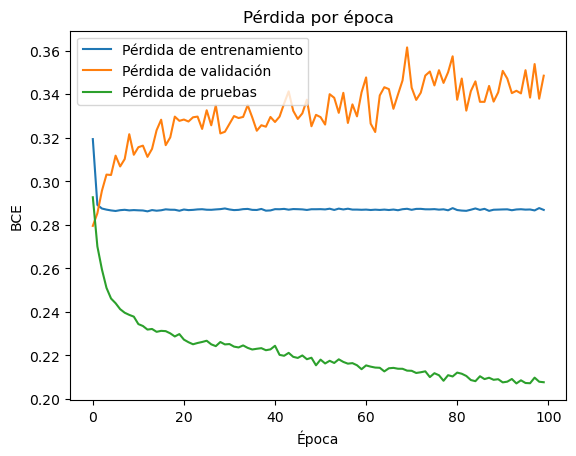

In [56]:
# Crear una figura y un eje para el gráfico de pérdida por época
fig, ax1 = plt.subplots(1, 1)

# Graficar la pérdida de entrenamiento, validación y pruebas
ax1.plot(train_loss_by_epoch, label="Pérdida de entrenamiento")
ax1.plot(valid_loss_by_epoch, label="Pérdida de validación")
ax1.plot(test_loss_by_epoch, label="Pérdida de pruebas")

# Agregar una leyenda al gráfico
ax1.legend()

# Configurar el título del gráfico
ax1.set_title("Pérdida por época")

# Configurar etiquetas en el eje x y el eje y
ax1.set_xlabel("Época")
ax1.set_ylabel("BCE")

#como se visualiza en el grafico presencia de overfitting
